# NLP Clustering Algorithm

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors 
import pandas as pd
import numpy as np
import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string 
from gensim.models import Word2Vec
from sklearn import cluster
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

## Preprocessing Functions

#### Preprocessing function
* Reducing inflection in words to their root form
* Removing punctuation
* Everything in lowercase
* Separating the sentence into a list of words

In [10]:
def text_process(text):
    stemmer = WordNetLemmatizer()
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join([i for i in nopunc])
    nopunc =  [word.lower() for word in nopunc.split() if word not in stopwords.words('english')]
    return [stemmer.lemmatize(word) for word in nopunc]


#### Vectorizing embedded words 

In [11]:
def vectorizer(sent,m):
    vec = []
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                vec = m[w]
            else:
                vec =  np.add(vec, m[w])
            numw+=1
        except:
            pass

    return np.asarray(vec) / numw

## Preprocessing Data

#### Reading list of raised issues - inspired by petition raised on government platform

In [12]:
sentences = pd.read_csv("data.csv")

In [13]:
sentences

,strings
0,"""Hold a public inquiry into Government contrac..."
1,"""Look into the money given out by Government c..."
2,"""Offer university student a partial refunds on..."
3,"""Reduce University student tuition fees from ..."
4,"""Reduce University tuition fees for UK citizen"""
5,"""Increase international students university t..."
6,"""Lower university tuition fees for students un..."
7,"""Force universities to offer a full refund to ..."
8,"""Scrap removal of free transport for under 18s..."
9,"""Ensure free tfl transport for under 18s"""


In [14]:
splitSent = []
for i in range(len(sentences)):
    splitSent.append(text_process(sentences["strings"][i]))
print(splitSent)

[['hold', 'public', 'inquiry', 'government', 'contract', 'granted', 'covid19'], ['look', 'money', 'given', 'government', 'contract', 'covid19'], ['offer', 'university', 'student', 'partial', 'refund', '20202021', 'tuition', 'fee'], ['reduce', 'university', 'student', 'tuition', 'fee', '£9250', '£3000'], ['reduce', 'university', 'tuition', 'fee', 'uk', 'citizen'], ['increase', 'international', 'student', 'university', 'tuition', 'fee', '£50000'], ['lower', 'university', 'tuition', 'fee', 'student', 'online', 'teaching', 'end'], ['force', 'university', 'offer', 'full', 'refund', 'university', 'student', 'due', 'covid19', 'pandemic'], ['scrap', 'removal', 'free', 'transport', '18', 'tfl', 'bailout'], ['ensure', 'free', 'tfl', 'transport', '18'], ['rethink', 'tfl', 'bailout', 'give', 'free', 'transport', 'minor'], ['covid19', 'vaccination', 'go', 'essential', 'worker', 'well', 'older', 'population'], ['essential', 'worker', 'receive', 'covid19', 'vaccine', 'first'], ['vaccination', 'priori

#### Word embedding function

In [15]:
m = Word2Vec(splitSent, size = 50, min_count=1, sg=1)

l = []
for i in splitSent:
    l.append(vectorizer(i,m))

X = np.array(l)

ipykernel_launcher:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
ipykernel_launcher:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [16]:
X

array([[-1.04038825e-03, -4.52658255e-03, -4.58204001e-03,
         1.21926621e-03,  1.21464871e-03, -2.27843551e-03,
        -1.38509623e-03, -8.04397103e-04, -3.45093198e-04,
        -7.36265560e-04, -3.58255557e-03, -3.09075834e-03,
        -1.25377811e-03,  3.35836085e-03,  1.81056117e-03,
         1.30394578e-03,  2.82700150e-03,  3.14828916e-03,
        -7.41072174e-04,  1.59693637e-03,  7.23783101e-04,
         2.66179326e-03,  7.61404081e-05,  4.35953261e-03,
         4.70128702e-03,  2.46855989e-03,  7.11730681e-05,
         7.07296596e-04, -1.07753731e-03, -4.52248240e-03,
         5.70130476e-04,  2.14379374e-03, -2.75349664e-03,
         1.70984783e-03, -1.49360416e-03, -2.20194110e-03,
        -2.05166754e-03, -3.13241355e-04, -5.87914314e-04,
         1.88489619e-03, -5.77348797e-03, -4.34848218e-04,
        -2.83693941e-03, -3.15901847e-03, -3.46452696e-03,
        -9.60413774e-04, -3.54327989e-04, -1.47266558e-03,
         3.83326667e-03, -3.16126016e-03],
       [-9.83

## Clustering Sentences

### Elbow method to determine number of clusters 

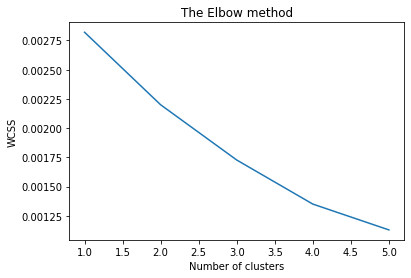

In [44]:
import matplotlib.pyplot as plt

wcss = []

for i in range(1,6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,6), wcss)
plt.title ('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Clustering similar sentences 

In [84]:
n_cluster = 4
clf = KMeans(n_clusters=n_cluster, max_iter=100, init='k-means++', n_init=1)
labels = clf.fit_predict(X)
print(labels)
for index, sentence in enumerate(splitSent):
    print(str(labels[index]) + " : " + str(sentence))

[2 2 1 1 1 1 1 1 0 0 0 3 3 3]
2 : ['hold', 'public', 'inquiry', 'government', 'contract', 'granted', 'covid19']
2 : ['look', 'money', 'given', 'government', 'contract', 'covid19']
1 : ['offer', 'university', 'student', 'partial', 'refund', '20202021', 'tuition', 'fee']
1 : ['reduce', 'university', 'student', 'tuition', 'fee', '£9250', '£3000']
1 : ['reduce', 'university', 'tuition', 'fee', 'uk', 'citizen']
1 : ['increase', 'international', 'student', 'university', 'tuition', 'fee', '£50000']
1 : ['lower', 'university', 'tuition', 'fee', 'student', 'online', 'teaching', 'end']
1 : ['force', 'university', 'offer', 'full', 'refund', 'university', 'student', 'due', 'covid19', 'pandemic']
0 : ['scrap', 'removal', 'free', 'transport', '18', 'tfl', 'bailout']
0 : ['ensure', 'free', 'tfl', 'transport', '18']
0 : ['rethink', 'tfl', 'bailout', 'give', 'free', 'transport', 'minor']
3 : ['covid19', 'vaccination', 'go', 'essential', 'worker', 'well', 'older', 'population']
3 : ['essential', 'worker

#### Using Principal component analysis to reduce dimensinality to plot clusters

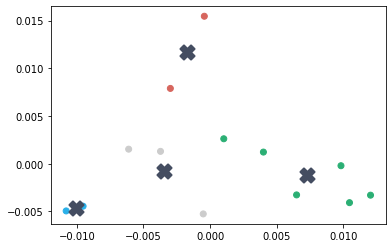

In [85]:
pca = PCA(n_components=n_cluster).fit(X)
coords = pca.transform(X)
label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#CCCCCC", "#D2CA0D", "#522A64", "#A3DV05", "#FC6514"]
colors = [label_colors[i] for i in labels]
plt.scatter(coords[:,0], coords[:,1], c=colors)
centroids = clf.cluster_centers_
centroid_coords = pca.transform(centroids)
plt.scatter(centroid_coords[:,0], centroid_coords[:,1], marker='X', s=200, linewidths=2, c="#444d61")
plt.show()